In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
combined = pd.read_csv("../data/skillshare_2022_starts_views_combined.csv", index_col=0)

In [3]:
combined.head()

,user_uid,create_time,success,is_cancelled,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,day-1,...,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31
0,23692129,2022-01-01 00:00:02,0,True,2,2,0,10,30,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23674285,2022-01-01 00:00:27,0,False,-1,-1,0,2,116,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16119588,2022-01-01 00:01:19,1,False,1,5,0,10,30,347.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23693101,2022-01-01 00:01:42,0,False,2,2,0,16,55,1211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23692349,2022-01-01 00:02:04,1,False,2,2,0,16,55,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
day_columns = [ f"day-{i}" for i in range(1, 32) ]

days_grouped_by_success = combined.groupby("success")\
    .mean()[day_columns]\
    .T

days_grouped_by_success.head()

success,0,1
day-1,1256.880150,1266.162601
day-2,632.769429,738.175651
day-3,364.517861,439.661097
day-4,272.971111,331.632765
day-5,225.134419,276.602550


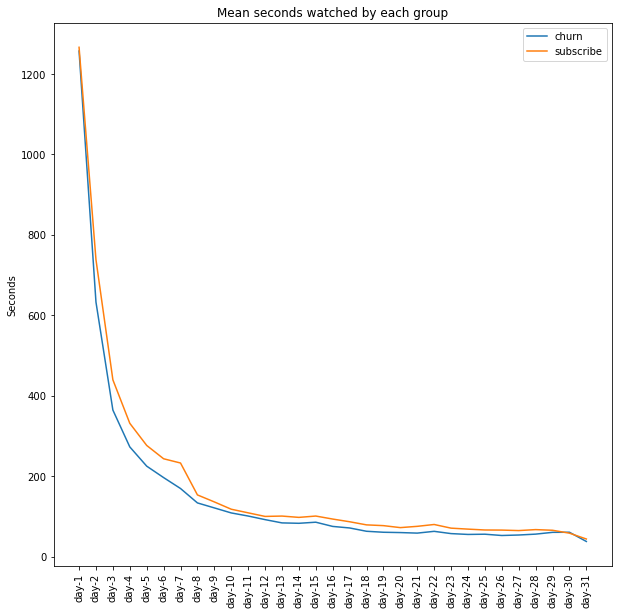

In [5]:
plt.figure(figsize=(10,10))
plt.plot(days_grouped_by_success[0], label='churn')
plt.plot(days_grouped_by_success[1], label='subscribe')
plt.title("Mean seconds watched by each group")
plt.ylabel("Seconds")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [6]:
# Sum all watch time of each trial day
combined['total_video_watch_time'] = combined[day_columns].sum(axis=1)
combined.head()

,user_uid,create_time,success,is_cancelled,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,day-1,...,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,total_video_watch_time
0,23692129,2022-01-01 00:00:02,0,True,2,2,0,10,30,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
1,23674285,2022-01-01 00:00:27,0,False,-1,-1,0,2,116,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16119588,2022-01-01 00:01:19,1,False,1,5,0,10,30,347.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,347.0
3,23693101,2022-01-01 00:01:42,0,False,2,2,0,16,55,1211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2106.0
4,23692349,2022-01-01 00:02:04,1,False,2,2,0,16,55,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


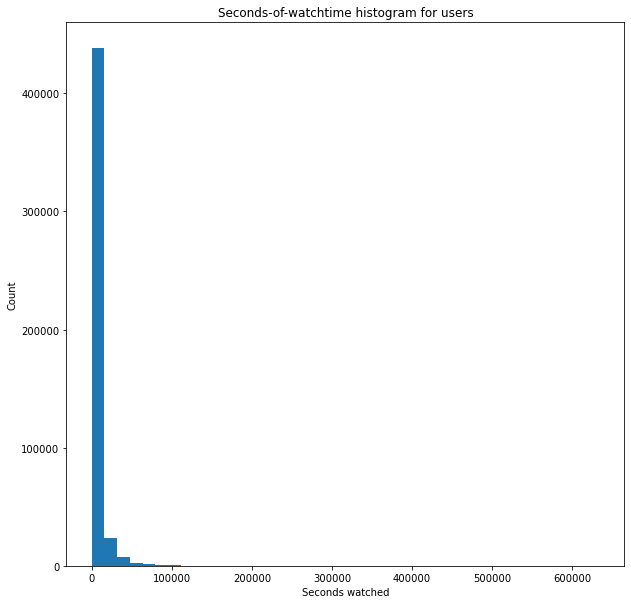

In [7]:
plt.figure(figsize=(10,10))
plt.hist(combined['total_video_watch_time'], bins=40)
plt.ylabel("Count")
plt.xlabel("Seconds watched")
plt.title("Seconds-of-watchtime histogram for users")
plt.show()


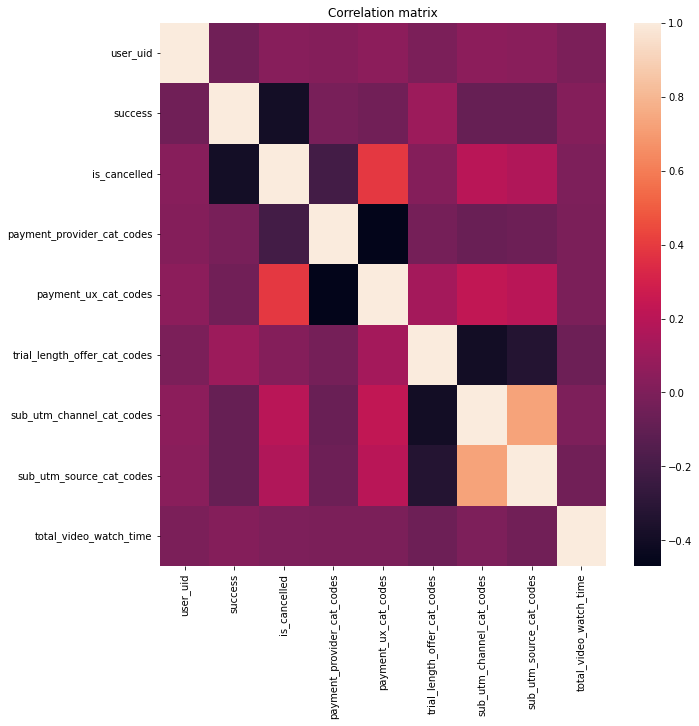

In [8]:
# Correlation matrix for all variables, excluding individual days
plt.figure(figsize=(10,10))

sns.heatmap(
    combined.drop(columns=day_columns)\
        .corr()\
        .round(2))

plt.title("Correlation matrix")
plt.show()

In [9]:
# Quick clustering
K = 4
kmeans = KMeans(n_clusters=K)
kmeans.fit(combined.drop(columns=["create_time", "user_uid"]))
kmeans

KMeans(n_clusters=4)

In [10]:
combined['kmeans cluster'] = kmeans.labels_
combined.head()

,user_uid,create_time,success,is_cancelled,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,day-1,...,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,total_video_watch_time,kmeans cluster
0,23692129,2022-01-01 00:00:02,0,True,2,2,0,10,30,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,1
1,23674285,2022-01-01 00:00:27,0,False,-1,-1,0,2,116,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,16119588,2022-01-01 00:01:19,1,False,1,5,0,10,30,347.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,347.0,1
3,23693101,2022-01-01 00:01:42,0,False,2,2,0,16,55,1211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2106.0,1
4,23692349,2022-01-01 00:02:04,1,False,2,2,0,16,55,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [11]:
combined.groupby("kmeans cluster")\
    .mean()['success']

kmeans cluster
0    0.276740
1    0.234337
2    0.254533
3    0.207585
Name: success, dtype: float64

In [12]:
days_grouped_by_cluster = combined.groupby("kmeans cluster")\
    .mean()[day_columns]\
    .T

days_grouped_by_cluster.head()

kmeans cluster,0,1,2,3
day-1,4256.248974,822.615043,4747.794683,6827.339321
day-2,2815.810348,289.417406,5926.021813,9456.277445
day-3,1603.909141,138.534817,5133.022495,8839.095808
day-4,1202.689750,96.206960,4202.090798,8018.225549
day-5,1012.431338,77.067999,3424.878664,7711.045908


In [13]:
cluster_labels = [f"cluster {i+1}" for i in combined['kmeans cluster'].unique()]

success_rate_by_cluster = combined.groupby("kmeans cluster")['success']\
    .describe()\
    .reset_index()

success_rate_by_cluster

,kmeans cluster,count,mean,std,min,25%,50%,75%,max
0,0,51178.0,0.276740,0.447391,0.0,0.0,0.0,1.0,1.0
1,1,416434.0,0.234337,0.423584,0.0,0.0,0.0,0.0,1.0
2,2,7335.0,0.254533,0.435628,0.0,0.0,0.0,1.0,1.0
3,3,501.0,0.207585,0.405983,0.0,0.0,0.0,0.0,1.0


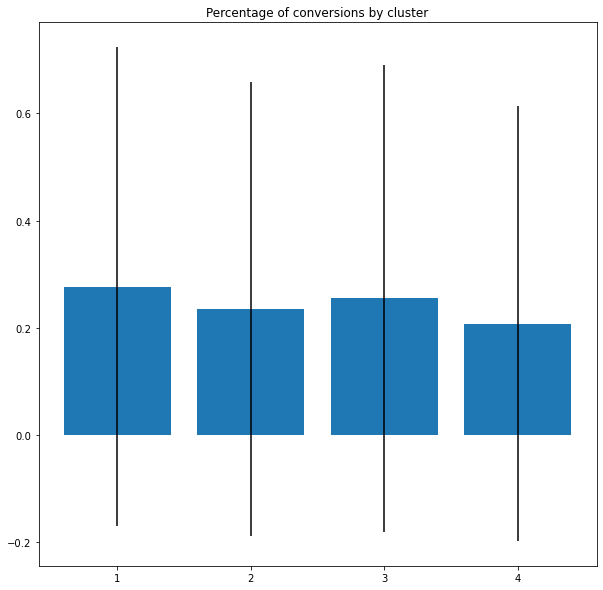

In [14]:
plt.figure(figsize=(10,10))
plt.bar(
    success_rate_by_cluster['kmeans cluster'] + 1,
    success_rate_by_cluster['mean'],
    yerr=success_rate_by_cluster['std']
)
plt.title("Percentage of conversions by cluster")
plt.xticks(
    [1, 2, 3, 4])
plt.show()

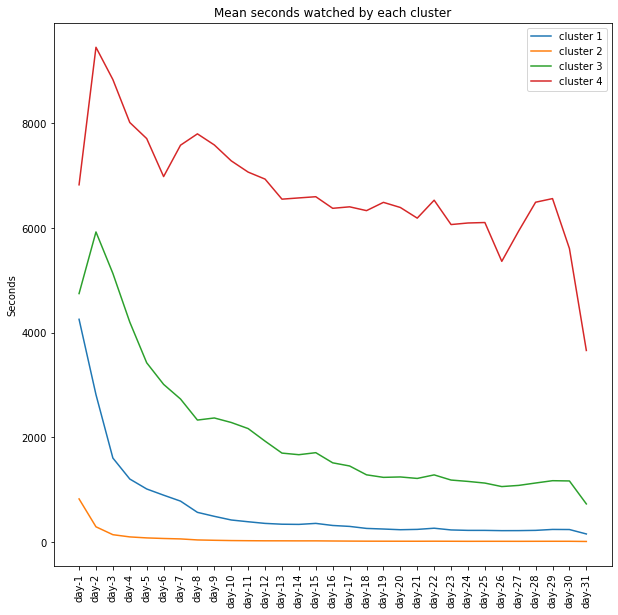

In [15]:
plt.figure(figsize=(10,10))
plt.plot(days_grouped_by_cluster[0], label='cluster 1')
plt.plot(days_grouped_by_cluster[1], label='cluster 2')
plt.plot(days_grouped_by_cluster[2], label='cluster 3')
plt.plot(days_grouped_by_cluster[3], label='cluster 4')
plt.title("Mean seconds watched by each cluster")
plt.ylabel("Seconds")
plt.xticks(rotation=90)
plt.legend()

In [16]:
X = combined.drop(columns=["user_uid", "create_time", "success", "is_cancelled"])
y = combined.success

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
# Try RFC to see what feature importances it finds
rfclf = RandomForestClassifier()
rfclf.fit(X_train, y_train)
rfclf.score(X_test, y_test)

0.7344820043411687

In [18]:
feature_importances = pd.Series(
    rfclf.feature_importances_,
    index=X.columns)\
    .sort_values(ascending=True)

feature_importances

kmeans cluster                  0.004216
day-31                          0.005161
day-30                          0.006704
day-27                          0.006878
day-28                          0.007021
day-29                          0.007155
day-24                          0.007169
day-26                          0.007318
day-23                          0.007419
day-20                          0.007597
day-25                          0.007678
day-22                          0.007915
day-21                          0.007918
day-19                          0.007998
day-18                          0.008379
day-17                          0.008670
day-16                          0.009572
day-14                          0.010114
day-15                          0.010325
day-13                          0.010731
day-12                          0.010819
day-11                          0.011417
day-10                          0.012479
trial_length_offer_cat_codes    0.013166
day-9           

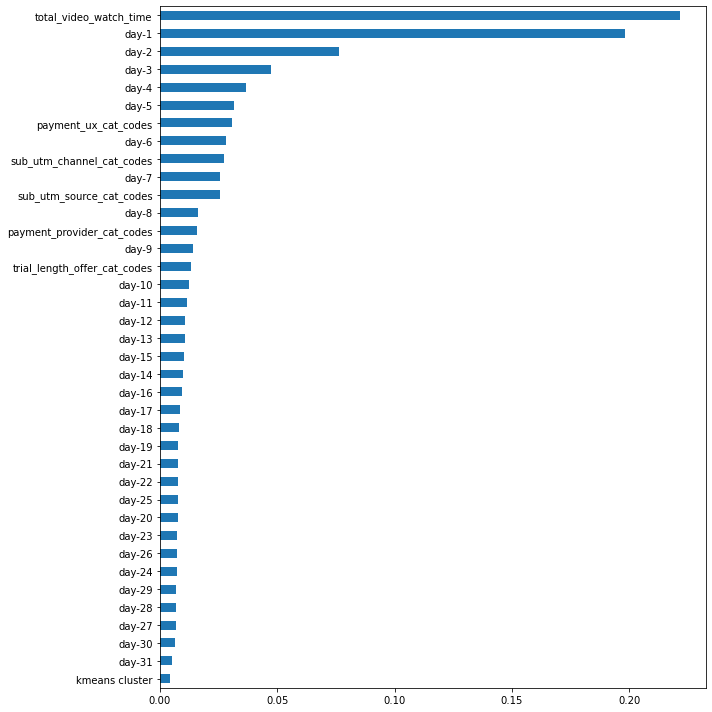

In [19]:
plt.figure(figsize=(10,10))
feature_importances.plot.barh()
plt.tight_layout()

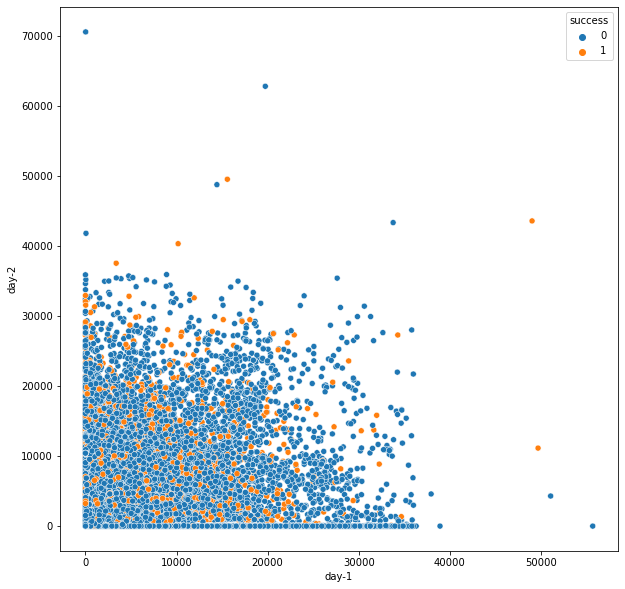

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    data=combined,
    x="day-1",
    y="day-2",
    hue="success"
)
plt.show()

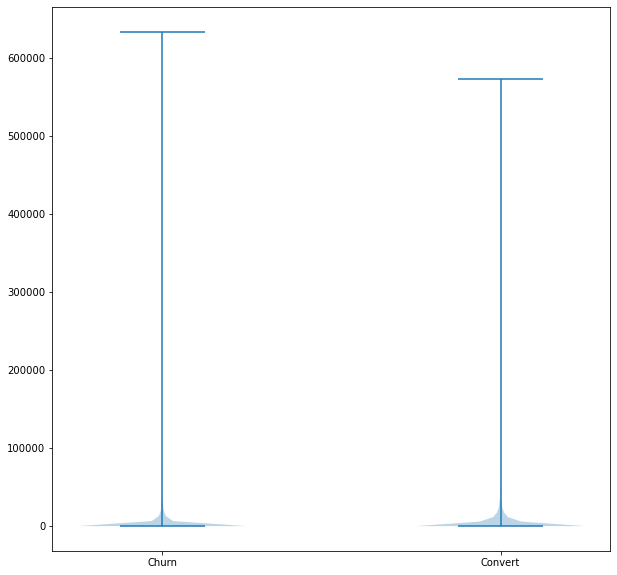

In [21]:
plt.figure(figsize=(10,10))
plt.violinplot(
    [combined[combined.success == 0].total_video_watch_time,
    combined[combined.success == 1].total_video_watch_time])
plt.xticks([1,2], ['Churn', 'Convert'])
plt.show()

In [22]:
starts_df = pd.read_csv('../data/skillshare_2022_starts.csv', index_col=0)
print(starts_df.columns)
starts_df.head()

/tmp/ipykernel_48873/2915541515.py:1: DtypeWarning: Columns (24,53) have mixed types. Specify dtype option on import or set low_memory=False.
  starts_df = pd.read_csv('../data/skillshare_2022_starts.csv', index_col=0)


Index(['id', 'user_uid', 'is_active', 'create_time', 'update_time',
       'realized_end_time', 'expiration_time', 'first_payment_time',
       'last_payment_time', 'next_billing_time', 'last_payment_attempt',
       'last_failed_payment_attempt', 'user_cancellation_time',
       'cancellation_time', 'refund_time', 'plan_length', 'plan_id',
       'coupon_id', 'coupon_code', 'coupon_trial_length', 'payment_provider',
       'payment_ux', 'is_paused', 'pause_time',
       'upgraded_subscription_from_id', 'is_refunded', 'is_resume',
       'paid_through', 'is_lapsed', 'is_pending', 'is_cancelled', 'has_paid',
       'is_paid', 'upgraded_subscription_to_id', 'trial_end', 'is_team',
       'is_no_cc_trial', 'is_scholarship', 'category', 'num_payments',
       'num_successful_payments', 'first_payment_currency_code',
       'subscription_number', 'paid_subscription_number',
       'eligible_subscription_number', 'is_p1_refunded', 'is_upgrade',
       'upgraded_from_id', 'was_upgraded', 'upg

,id,user_uid,is_active,create_time,update_time,realized_end_time,expiration_time,first_payment_time,last_payment_time,next_billing_time,...,is_direct_to_paid,trial_length_offer,had_trial,sub_utm_source,sub_utm_campaign,sub_utm_medium,sub_utm_term,sub_utm_channel,referral_source,eligible_trial_number
0,8794519,14996631.0,False,2022-01-01 00:12:27,2022-01-01 00:12:27,2022-06-23 12:56:46,NaN,NaN,NaN,NaN,...,False,None,False,ShortUrl,teacher-referral,teacher-referral,NaN,Teacher Referral,https://www.linkedin.com/,NaN
1,8794529,23693211.0,False,2022-01-01 00:15:05,2022-01-08 18:32:43,2022-01-08 18:32:43,2022-01-08 18:32:43,2022-01-08 00:17:31,2022-01-08 00:17:31,NaN,...,False,One Week,True,NaN,NaN,NaN,NaN,Organic Search,https://www.google.com/,1.0
2,8794531,23693219.0,True,2022-01-01 00:17:15,2022-01-01 00:17:15,2022-06-23 12:56:46,2023-01-31 10:00:00,2022-01-31 11:27:12,2022-01-31 11:27:12,NaN,...,False,One Month,True,Google,Brand_EN-UK_IE,paidsearch,how much is skillshare,Paid Search (Brand),NaN,1.0
3,8794558,23693241.0,False,2022-01-01 00:25:49,2022-02-01 03:31:19,2022-02-01 03:31:19,2022-02-01 03:31:19,NaN,NaN,NaN,...,False,One Month,True,youtube,2021-04-01-peter-mckinnon,paid-influencer-video,NaN,Youtube Influencer,https://www.youtube.com/,1.0
4,8794560,11790171.0,True,2022-01-01 00:26:54,2022-01-01 00:26:59,2022-06-23 12:56:46,NaN,2022-01-01 00:26:56,2022-01-01 00:26:56,2023-01-01 00:26:55,...,False,None,False,Google,Brand_EN-US,paidsearch,skillshare,Paid Search (Brand),https://www.google.com/,NaN


In [23]:
starts_df.payment_ux.unique()

array([nan, 'ApplePay', 'PayPal', 'CreditCard', 'GooglePay', 'UPI',
       'SepaDebit', 'Scholarship', 'PayTM', 'GiftCard', 'iDEAL',
       'Bancontact', 'Sofort', 'Stripe Link'], dtype=object)

In [24]:
starts_df.sub_utm_channel.unique()

array(['Teacher Referral', 'Organic Search', 'Paid Search (Brand)',
       'Youtube Influencer', 'Affiliate Referral', 'Direct',
       'Paid Search (Non-brand)', 'Missing', 'Email', 'Other',
       'Student Referral', 'Sponsored Posts', 'Paid Insta Ambassadors',
       'Organic Social', 'Podcast', 'Paid FB', 'Youtube Pre-roll',
       'Paid Insta Stories', 'Sponsored Newsletter'], dtype=object)

In [25]:
starts_df.sub_utm_source.unique()

array(['ShortUrl', nan, 'Google', 'youtube', '(direct)', 'Youtube', 'IR',
       'Bing', 'email', 'Product Email', 'blueshift', 'Blog', 'Ext-blogs',
       'Skillshare', 'bing', 'Karaandnate', 'Instagram', 'Video',
       'podcast', 'Product+Email', 'jess-kobeissi', 'Twitter',
       'dani-shapiro', 'emily-paluska', 'buffer', 'thestudenthotel',
       'kickstarter', 'globe', 'Email', 'freedom', 'buffer-advertising',
       'Product%20Email', 'Skillshare-blog', 'skdisneylander', 'facebook',
       'communication-preferences', 'society6', 'chidera-eggerue',
       'burnttoastcreative', 'thomas-frank', 'PearFleur', 'twitter',
       'indiafilmfestival2021', 'postpaid', 'product-email', 'bombay',
       'CourseTalk', 'chrystopher-rhodes', 'HappyDArtist',
       'Denise-Bayron', 'liskfeng', 'LavenderTowne', 'meeralee',
       'Facebook', 'YouTube', 'heatherseidel', 'diplomeo',
       'DrawingWiffWaffles', 'visa', 'hs_automation', 'perkbox', 'zalo',
       'scott-martin', 'newsletter', 'have